### Text Classification for Sentiment Analysis

In [1]:
import pandas as pd
data = pd.read_csv("imdb.csv", quotechar="'", escapechar="\\")
data[:10]

,Text,Class
0,One of the first of the best musicals Anchors ...,P
1,Visually disjointed and full of itself the dir...,N
2,These type of movies about young teenagers str...,P
3,I would rather of had my eyes gouged out with ...,N
4,The title says it all. Tail Gunner Joe was a t...,N
5,There is no greater disservice to do to histor...,P
6,National Lampoon Goes to the Movies (1981) is ...,N
7,I rented this on DVD yesterday and did not rea...,N
8,Midnight Cowboy is one of those films thats be...,P
9,Its not a big film. The acting is not amazing ...,P


In [2]:
import numpy as np
data["Class"] = np.where(data['Class'].str.contains("P"), 1, 0)

In [3]:
data[:10]

,Text,Class
0,One of the first of the best musicals Anchors ...,1
1,Visually disjointed and full of itself the dir...,0
2,These type of movies about young teenagers str...,1
3,I would rather of had my eyes gouged out with ...,0
4,The title says it all. Tail Gunner Joe was a t...,0
5,There is no greater disservice to do to histor...,1
6,National Lampoon Goes to the Movies (1981) is ...,0
7,I rented this on DVD yesterday and did not rea...,0
8,Midnight Cowboy is one of those films thats be...,1
9,Its not a big film. The acting is not amazing ...,1


In [4]:
train_data = data.sample(frac=0.75)
train_data[:10]

,Text,Class
2705,This could be looked at in many different ways...,0
1107,This sure is one comedy Im not likely to forge...,0
2817,This fanciful horror flick has Vincent Price p...,0
207,The direction struck me as poor mans Ingemar B...,0
7692,This really was the worst movie I have ever se...,0
332,Tressas vocal performance was Outstanding!! Tr...,1
4014,How Tasty Was My Little Frenchman tells a stor...,1
5700,There has been a political documentary of rece...,1
7862,Not only does this movie have a poor plot bad ...,0
5065,I saw this movie about 5 years ago and the mem...,0


In [5]:
test_data = data.drop(train_data.index)
test_data[:10]

,Text,Class
4,The title says it all. Tail Gunner Joe was a t...,0
19,OK this movie was cool. I dont think it was th...,1
28,Another too bad the lowest they can go here is...,0
29,There are some elements that save this movie f...,0
30,The Fiendish Plot of Dr. Fu Manchu starring Pe...,0
36,John Wayne & Albert Dekker compete for oil rig...,0
50,Edward Burtynsky is a Canadian photographer wh...,1
54,Let me first state that I enjoy watching bad m...,0
61,What did I just watch? I spent 90 minutes of m...,0
73,Wanda Nevada is a pubescent fantasy movie usin...,0


In [6]:
X_train = train_data["Text"]
X_train[:10]

2705    This could be looked at in many different ways...
1107    This sure is one comedy Im not likely to forge...
2817    This fanciful horror flick has Vincent Price p...
207     The direction struck me as poor mans Ingemar B...
7692    This really was the worst movie I have ever se...
332     Tressas vocal performance was Outstanding!! Tr...
4014    How Tasty Was My Little Frenchman tells a stor...
5700    There has been a political documentary of rece...
7862    Not only does this movie have a poor plot bad ...
5065    I saw this movie about 5 years ago and the mem...
Name: Text, dtype: object

In [7]:
Y_train = train_data["Class"]
Y_train[:10]

2705    0
1107    0
2817    0
207     0
7692    0
332     1
4014    1
5700    1
7862    0
5065    0
Name: Class, dtype: int64

In [8]:
X_test = test_data["Text"]
X_test[:10]

4     The title says it all. Tail Gunner Joe was a t...
19    OK this movie was cool. I dont think it was th...
28    Another too bad the lowest they can go here is...
29    There are some elements that save this movie f...
30    The Fiendish Plot of Dr. Fu Manchu starring Pe...
36    John Wayne & Albert Dekker compete for oil rig...
50    Edward Burtynsky is a Canadian photographer wh...
54    Let me first state that I enjoy watching bad m...
61    What did I just watch? I spent 90 minutes of m...
73    Wanda Nevada is a pubescent fantasy movie usin...
Name: Text, dtype: object

In [9]:
Y_test = test_data["Class"]
Y_test[:10]

4     0
19    1
28    0
29    0
30    0
36    0
50    1
54    0
61    0
73    0
Name: Class, dtype: int64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#create binary CountVectorizer 
count_vectorizer = CountVectorizer(binary=True, stop_words = 'english') #keeps track of each word in doc
count_vectorizer.fit(X_train) #perform only on training data
list(count_vectorizer.vocabulary_.keys())[0:10]

['looked',
 'different',
 'ways',
 'movie',
 'sucks',
 'good',
 'just',
 'plain',
 'weird',
 'probably']

In [11]:
#transform train & test sets of count vectorizer
X_train_count = count_vectorizer.transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [12]:
#create binary TfidVectorizer
tfidf_vectorizer = TfidfVectorizer(binary = True, stop_words = 'english')
tfidf_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [13]:
#transform train & test sets of Tfid vectorizer
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

fprs = []
tprs = []
auc_labels = []

#create log reg and bernoulli models for count vect
lr_count = LogisticRegression()
lr_count.fit(X_train_count, Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, lr_count.predict_proba(X_test_count)[:,1])
fprs.append(fpr)
tprs.append(tpr)
auc = metrics.roc_auc_score(Y_test, lr_count.predict_proba(X_test_count)[:,1])
auc_labels.append("Count (Log Reg), auc: "+str(round(auc,4)))

bern_count = BernoulliNB()
bern_count.fit(X_train_count, Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, bern_count.predict_proba(X_test_count)[:,1])
fprs.append(fpr)
tprs.append(tpr)
auc = metrics.roc_auc_score(Y_test, bern_count.predict_proba(X_test_count)[:,1])
auc_labels.append("Count (Bernoulli), auc: "+str(round(auc,4)))


#create log reg and bernoulli models for tfidf
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, lr_tfidf.predict_proba(X_test_tfidf)[:,1])
fprs.append(fpr)
tprs.append(tpr)
auc = metrics.roc_auc_score(Y_test, lr_tfidf.predict_proba(X_test_tfidf)[:,1])
auc_labels.append("TFIDF (Log Reg), auc: "+str(round(auc,4)))

bern_tfidf = BernoulliNB()
bern_tfidf.fit(X_train_tfidf, Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, bern_tfidf.predict_proba(X_test_tfidf)[:,1])
fprs.append(fpr)
tprs.append(tpr)
auc = metrics.roc_auc_score(Y_test, bern_tfidf.predict_proba(X_test_tfidf)[:,1])
auc_labels.append("TFIDF (Bernoulli), auc: "+str(round(auc,4)))

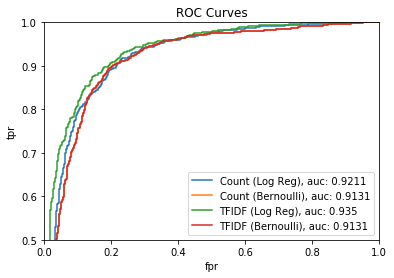

In [16]:
for fpr, tpr, auc_label in zip(fprs, tprs, auc_labels):
    plt.plot(fpr, tpr, label=auc_label)

plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.legend(loc = 4)
plt.xlim(0,1)
plt.ylim(0.5,1)
plt.show()

In [50]:
#class predictions
df = pd.DataFrame([X_test,Y_test]).transpose()
df["Predicted"] = lr_tfidf.predict(X_test_tfidf)
df

,Text,Class,Predicted
4,The title says it all. Tail Gunner Joe was a tag given to the Senator which relied upon the ignorance of the public about World War II aircraft. The rear facing moving guns relied upon a latch that would prevent the rear gunner from shooting off the tail of the airplane by preventing the gun from firing when it pointed at the tail. When the Senator was practicing on the ground one day he succeeded in shooting off the tail of the airplane. He couldnt have done that if the gun had been properly aligned. The gunnery officer responsible for that admitted in public before a camera that he was responsible -- he had made the error not the Senator. The fact that the film did not report that fact shows how one-sided it is. This film was designed to do one thing destroy the reputation of a complex person. A much better program was the PBS special done on him. He was a hard working intelligent ambitious politician who overcame extraordinary disadvantages to rise to extraordinary heights. He made some mistakes some serious mistakes but shooting the tail off an airplane was not one of them. The popularity of this film is due to the fact that the public likes simple stories one=sided stories so that they dont have to think.,0,1
19,OK this movie was cool. I dont think it was the best movie ever made but it sure was fun. My brother and I still act out scenes once in a while and will occasionally yank the movie out of the cupboard blow off the dust and pop it in. Enjoyable all the way until the end but a great concept. This is a movie that one has to just forget criticism all together and just enjoy. Judgment is victory for Robot Jox.,1,1
28,Another too bad the lowest they can go here is one. Otherwise this would get an easy zero. Truly one of the worst films I have ever seen. In fact were Peckenpahs name not on the thing I would never have guessed he did it. Actually one of the people in San Francisco I know was on the set a lot and from nearly sunup on he says that Sam was just plain snockered. It shows in spades. The laughing bit at the early part of the film is the ONLY thing in this entire mess worth a second look. Not even Gig Young is watchable. This is a true test of masochism. Had I been forced into the confines of a theatre to see it I would have jumped up screaming. And now I truly feel guilty having watched it all from the confines of a very comfortable couch that was just too nice to leave. What a mess it seemed less written than made up as they went along. Its not only a bomb but a bmob spelled backwards. Yikes!!!!!,0,0
29,There are some elements that save this movie from being a total catastrophe but are overshadowed with bad acting plot holes deus ex machina thrown ins stupid dialogs weak script and predictable clichés... What we have here is a horror movie with a storyline that goes nowhere for most of the time. A group of unlikely heroes including a black guy that gets it first (yeah that cliché seems to be still very much alive even in Finland) seem to have trouble trying to exit a mysteriously empty hospital. There are shrieking ghosts (very imaginative) zombies (at one point I thought at least they didnt use zombies but they came) and Finnish glam-rock band with demonic make-up on getting in their way. There is also some time-shift doodle present but it adds up nothing to the storyline. Autistic girl and a hobo seem to have some deeper understanding of a situation but they never spell it out to the viewer or their confused friends. Their lines consist only of profound life lesson thoughts like: What happens will happen... or Light cant live in the darkness... or the ominous I need a red crayon... red crayon. So all this characters (including worried father and sweet doctor in distress types) end up doing is running around them dark floors and from or mistakenly to the demons. Occasionally a ghost or a group of zombies show up and if it seems a demon keyboardist cant spot a group of six people coming

In [22]:
pd.set_option('display.max_colwidth', -1)

In [54]:
#instances where predictions do not match the actual class
incorrect_pred = df[(df["Class"]) != (df["Predicted"])]
incorrect_pred

,Text,Class,Predicted
4,The title says it all. Tail Gunner Joe was a tag given to the Senator which relied upon the ignorance of the public about World War II aircraft. The rear facing moving guns relied upon a latch that would prevent the rear gunner from shooting off the tail of the airplane by preventing the gun from firing when it pointed at the tail. When the Senator was practicing on the ground one day he succeeded in shooting off the tail of the airplane. He couldnt have done that if the gun had been properly aligned. The gunnery officer responsible for that admitted in public before a camera that he was responsible -- he had made the error not the Senator. The fact that the film did not report that fact shows how one-sided it is. This film was designed to do one thing destroy the reputation of a complex person. A much better program was the PBS special done on him. He was a hard working intelligent ambitious politician who overcame extraordinary disadvantages to rise to extraordinary heights. He made some mistakes some serious mistakes but shooting the tail off an airplane was not one of them. The popularity of this film is due to the fact that the public likes simple stories one=sided stories so that they dont have to think.,0,1
36,John Wayne & Albert Dekker compete for oil rights on Indian territory and for the attention of Martha Scott in this Republic Pictures film shot out of Utah USA. An interesting Western of sorts due to its characters and its more modern setting with Wayne & Dekker playing the old and new factions of the West. Its based on a story by Thomson Burtis who co-writes the script along with Eleanore Griffin and Ethel Hill. Albert Rogell directs in the workmanlike way that befits his career. A pretty mundane story is in truth saved by its final third where thankfully the action picks up and we are treated to something resembling a pulse. The light hearted approach to the romantic strand doesnt sit quite right and a glorious fist fight between the two protagonists is ruined by Rogell being unable to disguise the stunt men doing the work. But hey stunt men deserve their moment of glory always. Solid support comes from George Gabby Hayes and Wayne as usual has much screen charisma particularly when rattling off his pistol. But in spite of its better than usual Republic budget it remains a film of interest only to 1940s Wayne enthusiasts. 4/10,0,1
119,Well well....Roeg touched a bit of a nerve there didnt he? He was a genius while he was cataloguing his various characters descents into psychosis for a couple of decades but as soon as he has the bad taste to suggest that redemption (or even some good advice) might be found in the bad old Catholic church the hipper-than-thou alternative movie crowd gets extra vicious. Worse still Theresa Russells character - faced with experiences that nothing in her avowedly rationalist outlook has an explanation for is unwillingly forced to deal with those experiences on another level - that of the spiritual. You know the realm of the ignorant and superstitious the sort of thing that the art-house cinephiles are supposed to be above. Oh the horror... So she finds her marriage - the idea that it might be a uniquely important commitment - affirmed by what seems uncomfortably like divine intervention. People who find this idea prima facie offensive could maybe ask themselves why they instinctively jump into attack mode at being challenged to take seriously the idea of a spiritual dimension to their lives. But they probably wont. Sure this film has some problems notably Talia Shires delirious hamwork as the overwrought nun 1950s-style attire and all. And the dialogue between Marie Davenport and the young priest in their last scene is straight out of the Spellbound School of Glib Interpretations (though Hitchcocks movie escaped similar charges due to the source of wisdom having impeccably secular credentials as a Freudian psychoanalyst). But sadly Nicolas Roeg appears to have 